<a href="https://colab.research.google.com/github/KaissonFerreira/Projeto_SeP500_Financial_Actions/blob/main/Jupyter_notebook/project_S%26P500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

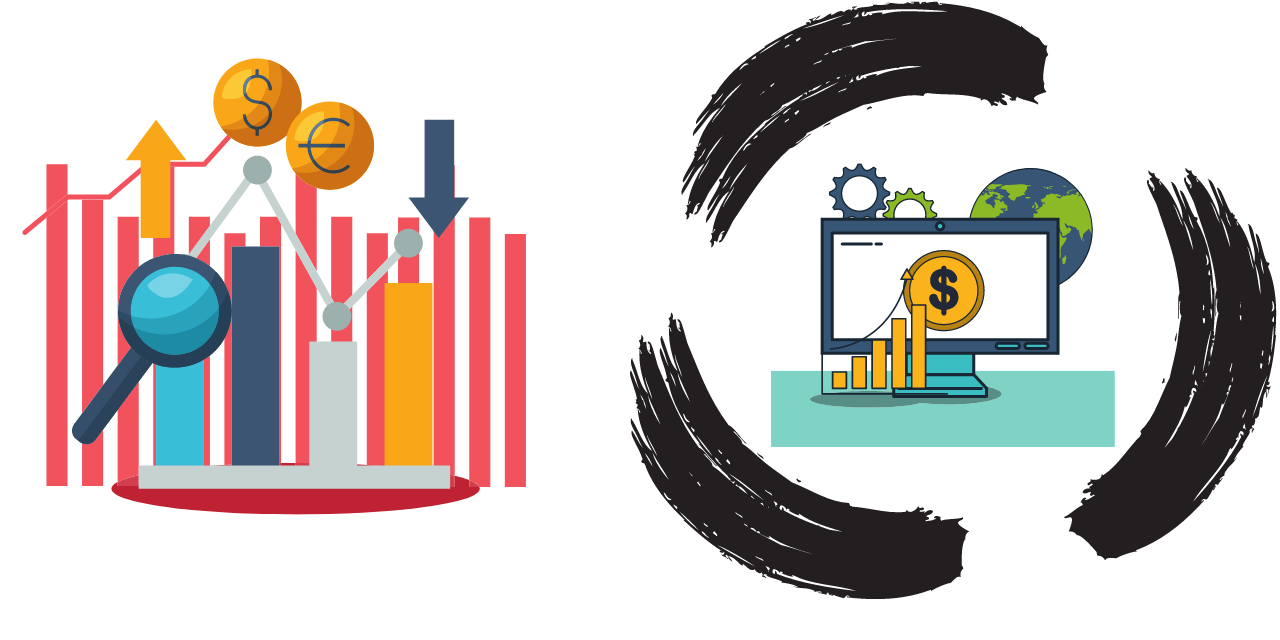

#**S&P 500 - (banco de dados retirados do Kaggle)**
https://www.kaggle.com/paytonfisher/sp-500-companies-with-financial-information


---

##Contexto de negócio##


---


  O S&P 500 é um índice ponderado por capitalização das **500 maiores empresas de capital aberto** dos Estados Unidos (significando as 500 maiores empresas com maior capitalização de mercado). O índice S&P 500 é um índice útil para estudar porque geralmente reflete a saúde de todo o mercado de ações dos Estados Unidos. 

  Nesse banco de dados proposto, podemos encontrar alguns dos principais indicadores para investir em uma empresa. Tais indicadores estão correlacionados com as 500 maiores empresas de capitalização dos EUA. Assim, um dos objetivos desse projeto é **analisar as empresas que possuem maiores chances de valorização em suas ações**. Entretanto, vale ressaltar, que por si só, esses indicadores não são suficientes para ter um alto grau de confiabilidade a longo prazo, mas é possível retirar alguns insight que possam **auxiliar** na tomada de decisão do investidor para escolher em qual ação investir.

  Para analisar uma determinada ação de uma empresa e verificar se vale a pena investir nela, há dois métodos de avaliação. O primeiro deles é a **análise fundamentalista**, que tem por objetivo obter lucros no investimento a médio e longo prazo, e a **análise técnica**, que tem por objetivo obter ganhos financeiros a curto prazo, e, que de modo simplório, esse tipo de análise tem como foco os padrões e movimentações das ações por meio de gráficos.

  Esse projeto aborda uma análise fundamentalista, mediante aos tipos de dados oferecidos. Esse tipo de análise consiste em fundamentos quantitativos e qualitativos.

* **Fundamentos quantitativos**: São aqueles que são medidos em números **(os 
dados do projetos estão inseridos nessa categoria)**.

* **Fundamentos qualitativos**: São fatores internos e externos que podem contribuir com a rentabilidade e crescimento da empresa, favorencendo seus ganhos financeiros, mas que também podem levar uma empresa ao prejuízo, e consequentemente, aos acionistas.






#**Cumprimento de alguns requisitos para geração de Insights**
Categorizando as empresas por setores, temos que:
* Identificar quais são os setores que tem uma maior lucrativade;
* Identificar quais são os setores que tem um maior retorno de dividendos para os acionistas;
* Identificar quais são os setores mais valiosos no mercado (Market cup);

Analisando as empresas dos principais setores, temos que: 

* Identificar quais são as melhores empresas para se investir em cada setor, analisando o P/E e o dividendo Yeld;
* Analisar o Market Cup (capitalização de mercado) das empresas escolhidas;
* Analisar o número de ações de cada empresa;
* Identificar quais empresas apresentam uma melhor gestão operacional de caixa, sem atribuir os efeitos financeiros e de impostos; (Analisar o EBITDA)
* Identificar quais são as empresas que demonstram um maior potencial de crescimentos; (Analisar o Prices/book)

#**Passo a passo de um projeto de dados** :



1.   Entendimento do desafio
2.   Entendimento da área/empresa
3.   Extração/Obtenção de dados
4.   Ajuste de dados (tratamento/limpeza)
5.   Análise exploratória
6.   Modelagem + algorítmos (modelos de machine learning)
7.   Interpretação de resultados

## **Import**


Importando algumas bibliotecas que serão utilizadas no projeto:


In [215]:
# Bibliotecas para visualização dos dados: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # Biblioteca interessante para uma análise mais detalhada dentro das figuras, tipo um Dashboard.

# Bibliotecas para análise de Machine Learning:



## **Extração e tratamento**

Importando a base de dados e verificando se há elementos faltantes.

In [65]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projeto S&P 500/financials.csv')
#Soma dos elementos faltantes em cada atributo (coluna)
print(df.isnull().sum()) 
# Renomeando algumas colunas
df=df.rename(columns={'Price/Earnings':'P/E','Dividend Yield':'DY','Earnings/Share':'E/S','Price/Sales':'P/S','Price/Book':'P/B'})
df.head()

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    2
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        8
SEC Filings       0
dtype: int64


,Symbol,Name,Sector,Price,P/E,DY,E/S,52 Week Low,52 Week High,Market Cap,EBITDA,P/S,P/B,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


Observa-se que há alguns elementos vazios no indicador P/E (Price/Earnings ou preço da ação pelo lucro). Então podemos calcular as células faltantes pela razão entre os dados da coluna Price (Preço da ação) e da coluna E/S (Earnings/Shere ou lucro por ação).

In [66]:
df['P/E'].fillna(df['Price']/df['E/S'], inplace=True)
print(df['P/E'].isnull().sum()) #Verificando se de fato foram preenchidos os dados faltante na coluna Price/Earnings.

0


Os elementos vazios presentes na coluna P/B (Price/Book ou preço sobre valor patrimonial) não serão tratados no momento. Quando ocorrer as análises sobre esse indicador, poderemos afirmar de qual maneira ele poderá ser tratado.
Desse modo, terminamos a parte de tratamento e limpeza dos dados.

##**Análise Exploratória**


---



---


Na análise exploratória, poderemos retirar alguns dos insights propostos no inicio desse projeto. Para isso, será dividido em dois segmentos, um caracterizado pela análise entre setores e o outro carcterizado pela análise de empresas do mesmo setor (diga-se por passagem, que é uma análise bem mais conveniente).

###**Comparação de alguns indicadores entre o mesmo setor**


---
Nesta seção, será feita apenas uma análise superficial de dois indicadores (DY - Rendimento de dividendos e P/E - Preço da ação por lucro) para cada setor. Apesar de que a comparação por setor não ser tão interessante na análise fundamentalista, pode-se observar algumas tendências para a escolha de algum setor, e por fim analisar e comparar os indicadores das empresas daquele setor.

Analisando a quantidade empresas por setor:

In [67]:
df['Sector'].value_counts()


Consumer Discretionary        84
Information Technology        70
Financials                    68
Industrials                   67
Health Care                   61
Consumer Staples              34
Real Estate                   33
Energy                        32
Utilities                     28
Materials                     25
Telecommunication Services     3
Name: Sector, dtype: int64

In [228]:
fig1 = px.histogram(df,x='Sector',color= 'Sector', title='Quantidade de empresas por setor', height= 500)
fig1.show()

In [139]:
#plt.figure(figsize= (25,6))
#plt.title('Boxplot dos rendimentos de dividendos para cada setor')
#ax = sns.boxplot(x='Sector',y='DY',data=df);

In [157]:

fig = px.box(df, x= 'Sector',y= 'DY',title= 'Boxplot dos rendimentos de divendendos por setor',notched=False,height=500)
fig.show()


Observa-se que alguns dos setores com menos empresas, como o setor de telecomunicação, o setor de utilidade e o setor de imobiliária, tem os melhores rendimentos de uma maneira geral. Diante disso, poderemos aprofundar um pouco mais nesses setores, visando bons dividendos para o investidor.

In [179]:
fig = px.box(df, x= 'Sector',y= 'P/E',title= 'Boxplot do indicador P/E por setor',notched=False,height=1000)
fig.show()

Quando o indicador P/E está muito elevado, isso demonstra que os investidores estão esperando um maior crescimento dos lucros futuros em comparação com às empresas do mesmo setor que estão com indicador mais baixo, ou pode ser que a ação esteja cara demais. Diante disso, podemos observar que alguns setores como energia e tecnologia da informação, há empresas que podem possuir indícios de potencial crescimento. Assim, isso poderá ser avaliado de forma mais profunda na próxima seção. 

###**Comparação dos indicadores entre empresas do mesmo setor**
---
Por ser vários setores envolvidos e com muitos indicadores para analisar, temos que fragmentar o nosso campo de dados. Assim, escolheremos apenas o setor de **Tecnologia da informação** (Esse setor foi escolhido com base de que pode haver empresas que tem um elevado potencial de crescimento)


### **Indicador Price, P/E e Earnings:**


Esses indicadores estão diretamente correlacionados, uma vez que P/E = Price (Preço por ação) / Earnings (Lucro por ação).
Assim, poderemos analisar somente o P/E das empresas de cada setor:

In [216]:
setor = df['Sector'].unique() # Gravando a lista de setores dentro de uma variável.
setor.sort() # Colocando os nomes dos setores em ordem alfabética
setor


array(['Consumer Discretionary', 'Consumer Staples', 'Energy',
       'Financials', 'Health Care', 'Industrials',
       'Information Technology', 'Materials', 'Real Estate',
       'Telecommunication Services', 'Utilities'], dtype=object)

In [227]:
# Imprimindo o gráfico de barras para o setor escolhido
a = setor[6] # Identificação do setor de tecnologia
fig = px.bar(df.query('@a in Sector'), x= 'Name',y= 'P/E',title= "Gráfico de barras do indicador P/E no setor de '{}'".format(a),height=700)
fig.show()


O índice P/E pode significar o quão cara está uma ação (se vale a pena comprar ou não). Quanto mais elevado for o P/E, mais cara ela está. 
Entrentanto, esse índice é baseado na oferta e procura, logo para empresas do ramo de tecnologia, algumas delas tendem a crescer exponencialmente, e isso faz com que a procura seja grande, encarecendo o valor de uma ação.
Por isso, é preciso observar outros indicadores para verificar se realmente compensa investir naquela ação.

**Alguns pontos levantados nesse gráfico de barras:**

* As empresa SalesForce, Netflix e Advanceds Micro Devis são as empresas com os mais elevados P/E, especialmente a primeira que ultrapassa os 500 pontos. Para saber se vale a pena investir nessas empresas, teremos que observar também o preço e o lucro de cada ação. Isso nos dará algum indicativo de que há chances da empresa crescer futuramente.
* A única empresa com o P/E negativo é a AutoDesk. Mas não quer dizer necessariamente que é um má indicativo.


In [241]:
#Gráfico de barras para o Price (preço das ações):
fig1 = px.bar(df.query('@a in Sector'), x= 'Name',y= 'Price',title= "Gráfico de barras do indicador Price no setor de '{}'".format(a),height=600)
fig1.show()

In [239]:
# Gráfico de barras referente à Earnings (lucro por ação)
fig = px.bar(df.query('@a in Sector'), x= 'Name',y= 'E/S',title= "Gráfico de barras do indicador Earnings (Lucro por ação) no setor de '{}'".format(a),height=600)
fig.show()

'Industrials'